In [47]:
# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance

In [48]:
# 2. Load and Preview Data
data = pd.read_csv("IRIS.csv")
print(data.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [49]:
# 3. Check for Missing Values and Handle Them
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [50]:
# 4. Encode Target Labels
label_encoder = LabelEncoder()
data["species"] = label_encoder.fit_transform(data["species"])

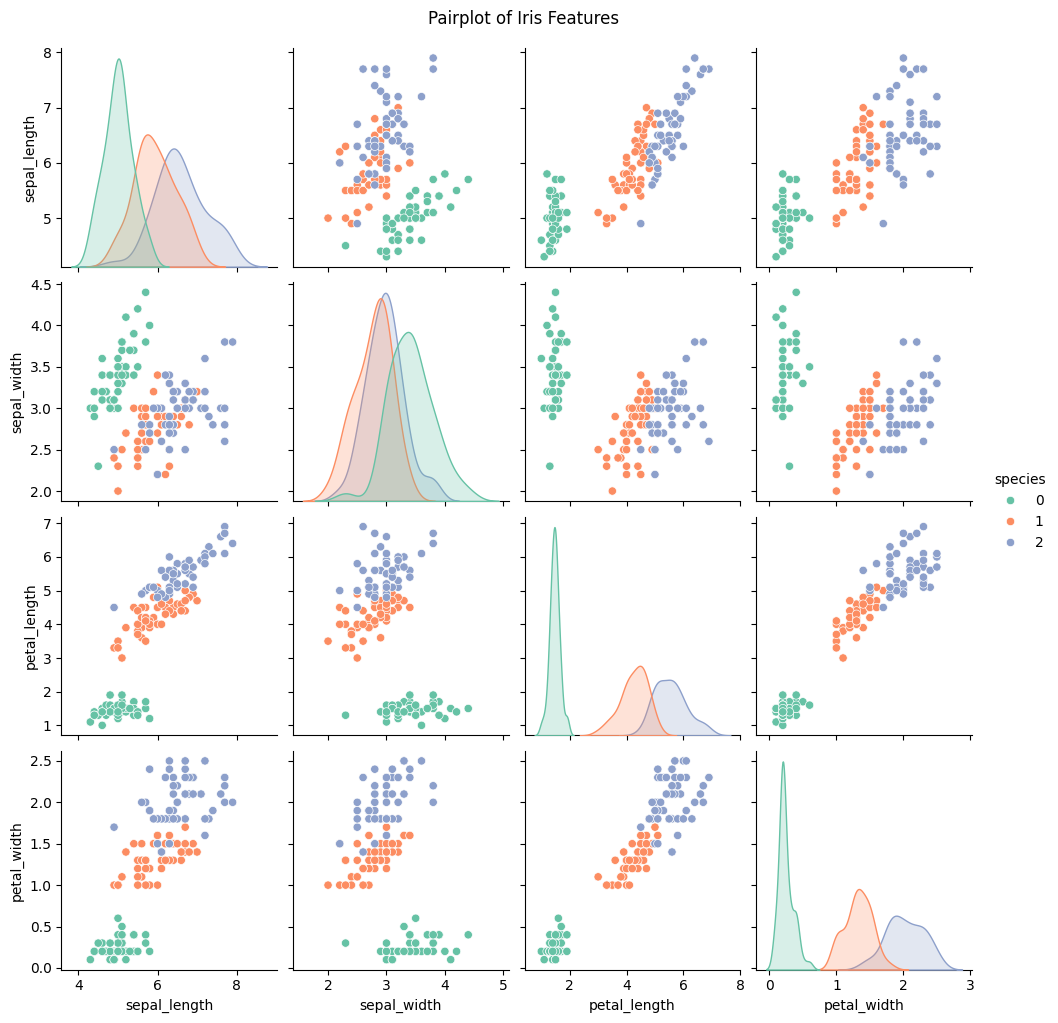

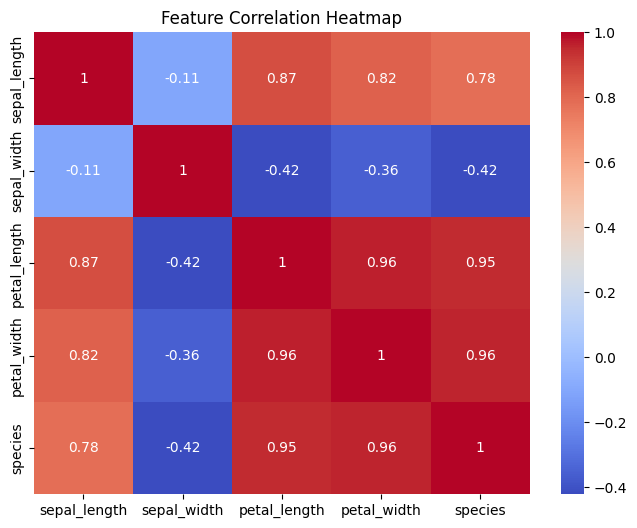

In [51]:
# 5. Explore Data – Visualizations

# Pairplot: see how features relate and how species differ
sns.pairplot(data, hue="species", palette="Set2")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [52]:
# 6. Split Data into Train/Test
y = data["species"]
X = data.drop(columns=["species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# 7. Train XGBoost Classifier
model = XGBClassifier(n_estimators=1000, learning_rate=0.05, random_state=42, n_jobs=4)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=4, num_parallel_tree=None, ...)

In [54]:
# 8. Predict and Evaluate
predictions = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, predictions))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, predictions))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



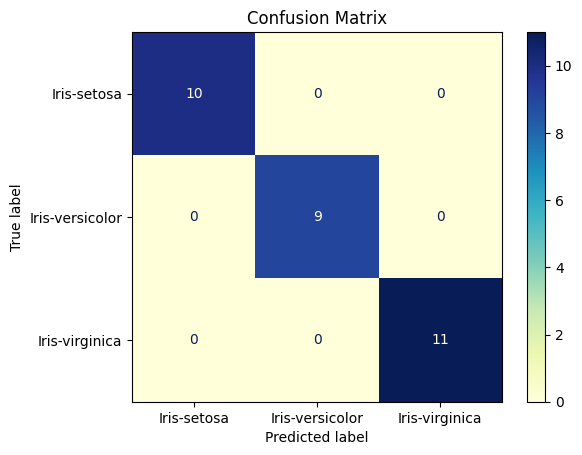

In [55]:
# 9. Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()


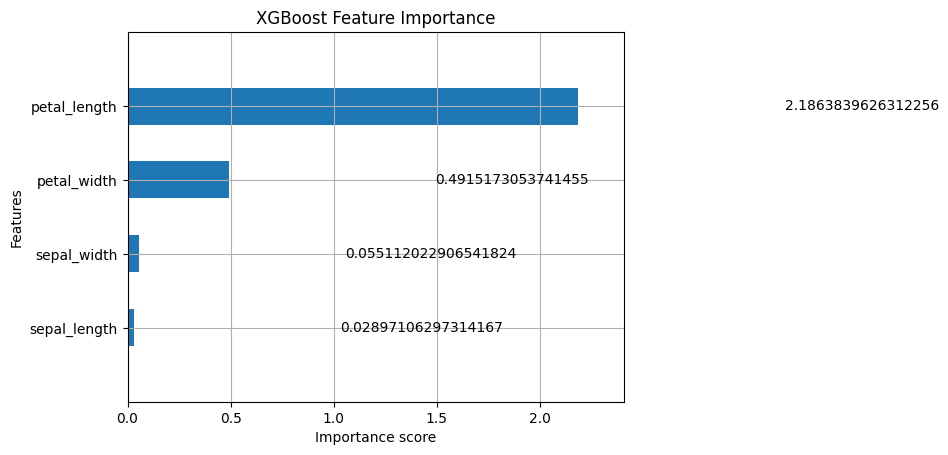

In [57]:
# 10. Feature Importance (XGBoost)
plot_importance(model, importance_type='gain', height=0.5)
plt.title("XGBoost Feature Importance")
plt.show()


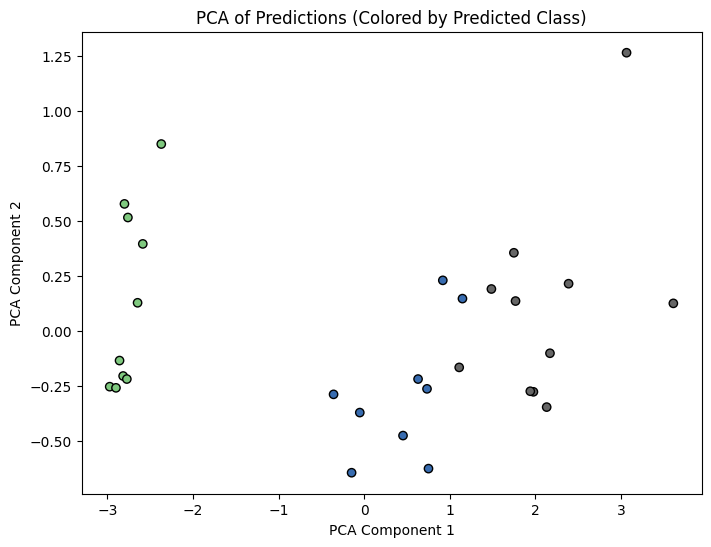

In [58]:
# 11. PCA – Visualize Predictions in 2D
pca = PCA(n_components=2)
X_test_reduced = pca.fit_transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=predictions, cmap='Accent', edgecolor='k')
plt.title("PCA of Predictions (Colored by Predicted Class)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
